<a href="https://colab.research.google.com/github/MJanbandhu/Machine-Learning/blob/main/Logistic_Regression_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Business Case: To predict whether a person will have diabetes or not.

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## Load the data
data=pd.read_csv('diabetes1.csv')

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Basic checks

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.tail()

In [ ]:
data.columns

In [ ]:
data.dtypes

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
data.shape

### Domain Analysis

### Exploratory data analysis

**Step 1 Univariate Analysis**
- histplot is used to check distribution of the data
- count plot is used to check whether data is balanced or not.

In [ ]:
# Check whether data is balanced or not
# means equal no. of records related to diabetic and non diabetic patients
plt.figure(figsize=(6,2))
sns.countplot(x=data.Outcome)

**Insights**
- clearly data is imbalanced since we have more records related to non diabetic and less records related to diabetic

In [ ]:
data.columns

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()


#### Bivariate Analysis

In [ ]:
##Bivariate Analysis refers to plots between input variables and target variable.

## Analyzing how preganancies impact the patient with diabetes.
plt.figure(figsize=(7,2))
sns.countplot(x='Pregnancies',data=data,hue='Outcome')
plt.show()

In [ ]:
## Aanlyzing the relationship between diabetes and Glucose
plt.figure(figsize=(6,2))
sns.histplot(x='Glucose',hue='Outcome',data=data)

In [ ]:
## Analyze relationship between BloodPressure and Outcome
plt.figure(figsize=(6,2))
sns.histplot(x='BloodPressure',hue='Outcome',data=data)

In [ ]:
## Analyzing Insulin with target
plt.figure(figsize=(6,2))
sns.histplot(x='Insulin',hue='Outcome',data=data)

In [ ]:
## Analyzing Age with target
plt.figure(figsize=(6,2))
sns.histplot(x='Age',hue='Outcome',data=data)

In [ ]:
## Analyzing BMI with target
plt.figure(figsize=(6,2))
sns.histplot(x='BMI',hue='Outcome',data=data)
plt.show()

In [ ]:
## Analyze Glucose with blood pressure

sns.relplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)
plt.show()

In [ ]:
## Analyze Glucose with SkinThickness

sns.relplot(x='Glucose',y='SkinThickness',hue='Outcome',data=data)
plt.show()

In [ ]:
## Analyze BP with SkinThickness

sns.relplot(x='BloodPressure',y='SkinThickness',hue='Outcome',data=data)
plt.show()

In [ ]:
## Analyze BP with Insulin

sns.relplot(x='BloodPressure',y='Insulin',hue='Outcome',data=data)
plt.show()

#### Multivariate Analysis

In [ ]:
sns.pairplot(data,hue='Outcome')

### Data Preprocessing

In [ ]:
# check for null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Check for duplicates
data.duplicated().sum()

0

In [ ]:
data.describe()

In [ ]:
#checking the records where i have 0 values
data.loc[data['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [ ]:
np.median(data.Glucose)

117.0

In [ ]:
data.Glucose.replace(0,np.median(data.Glucose),inplace=True)

In [ ]:
data.loc[data['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
data.BloodPressure.replace(0,np.median(data.BloodPressure),inplace=True)
data.SkinThickness.replace(0,np.median(data.SkinThickness),inplace=True)
data.Insulin.replace(0,np.median(data.Insulin),inplace=True)
data.BMI.replace(0,np.median(data.BMI),inplace=True)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


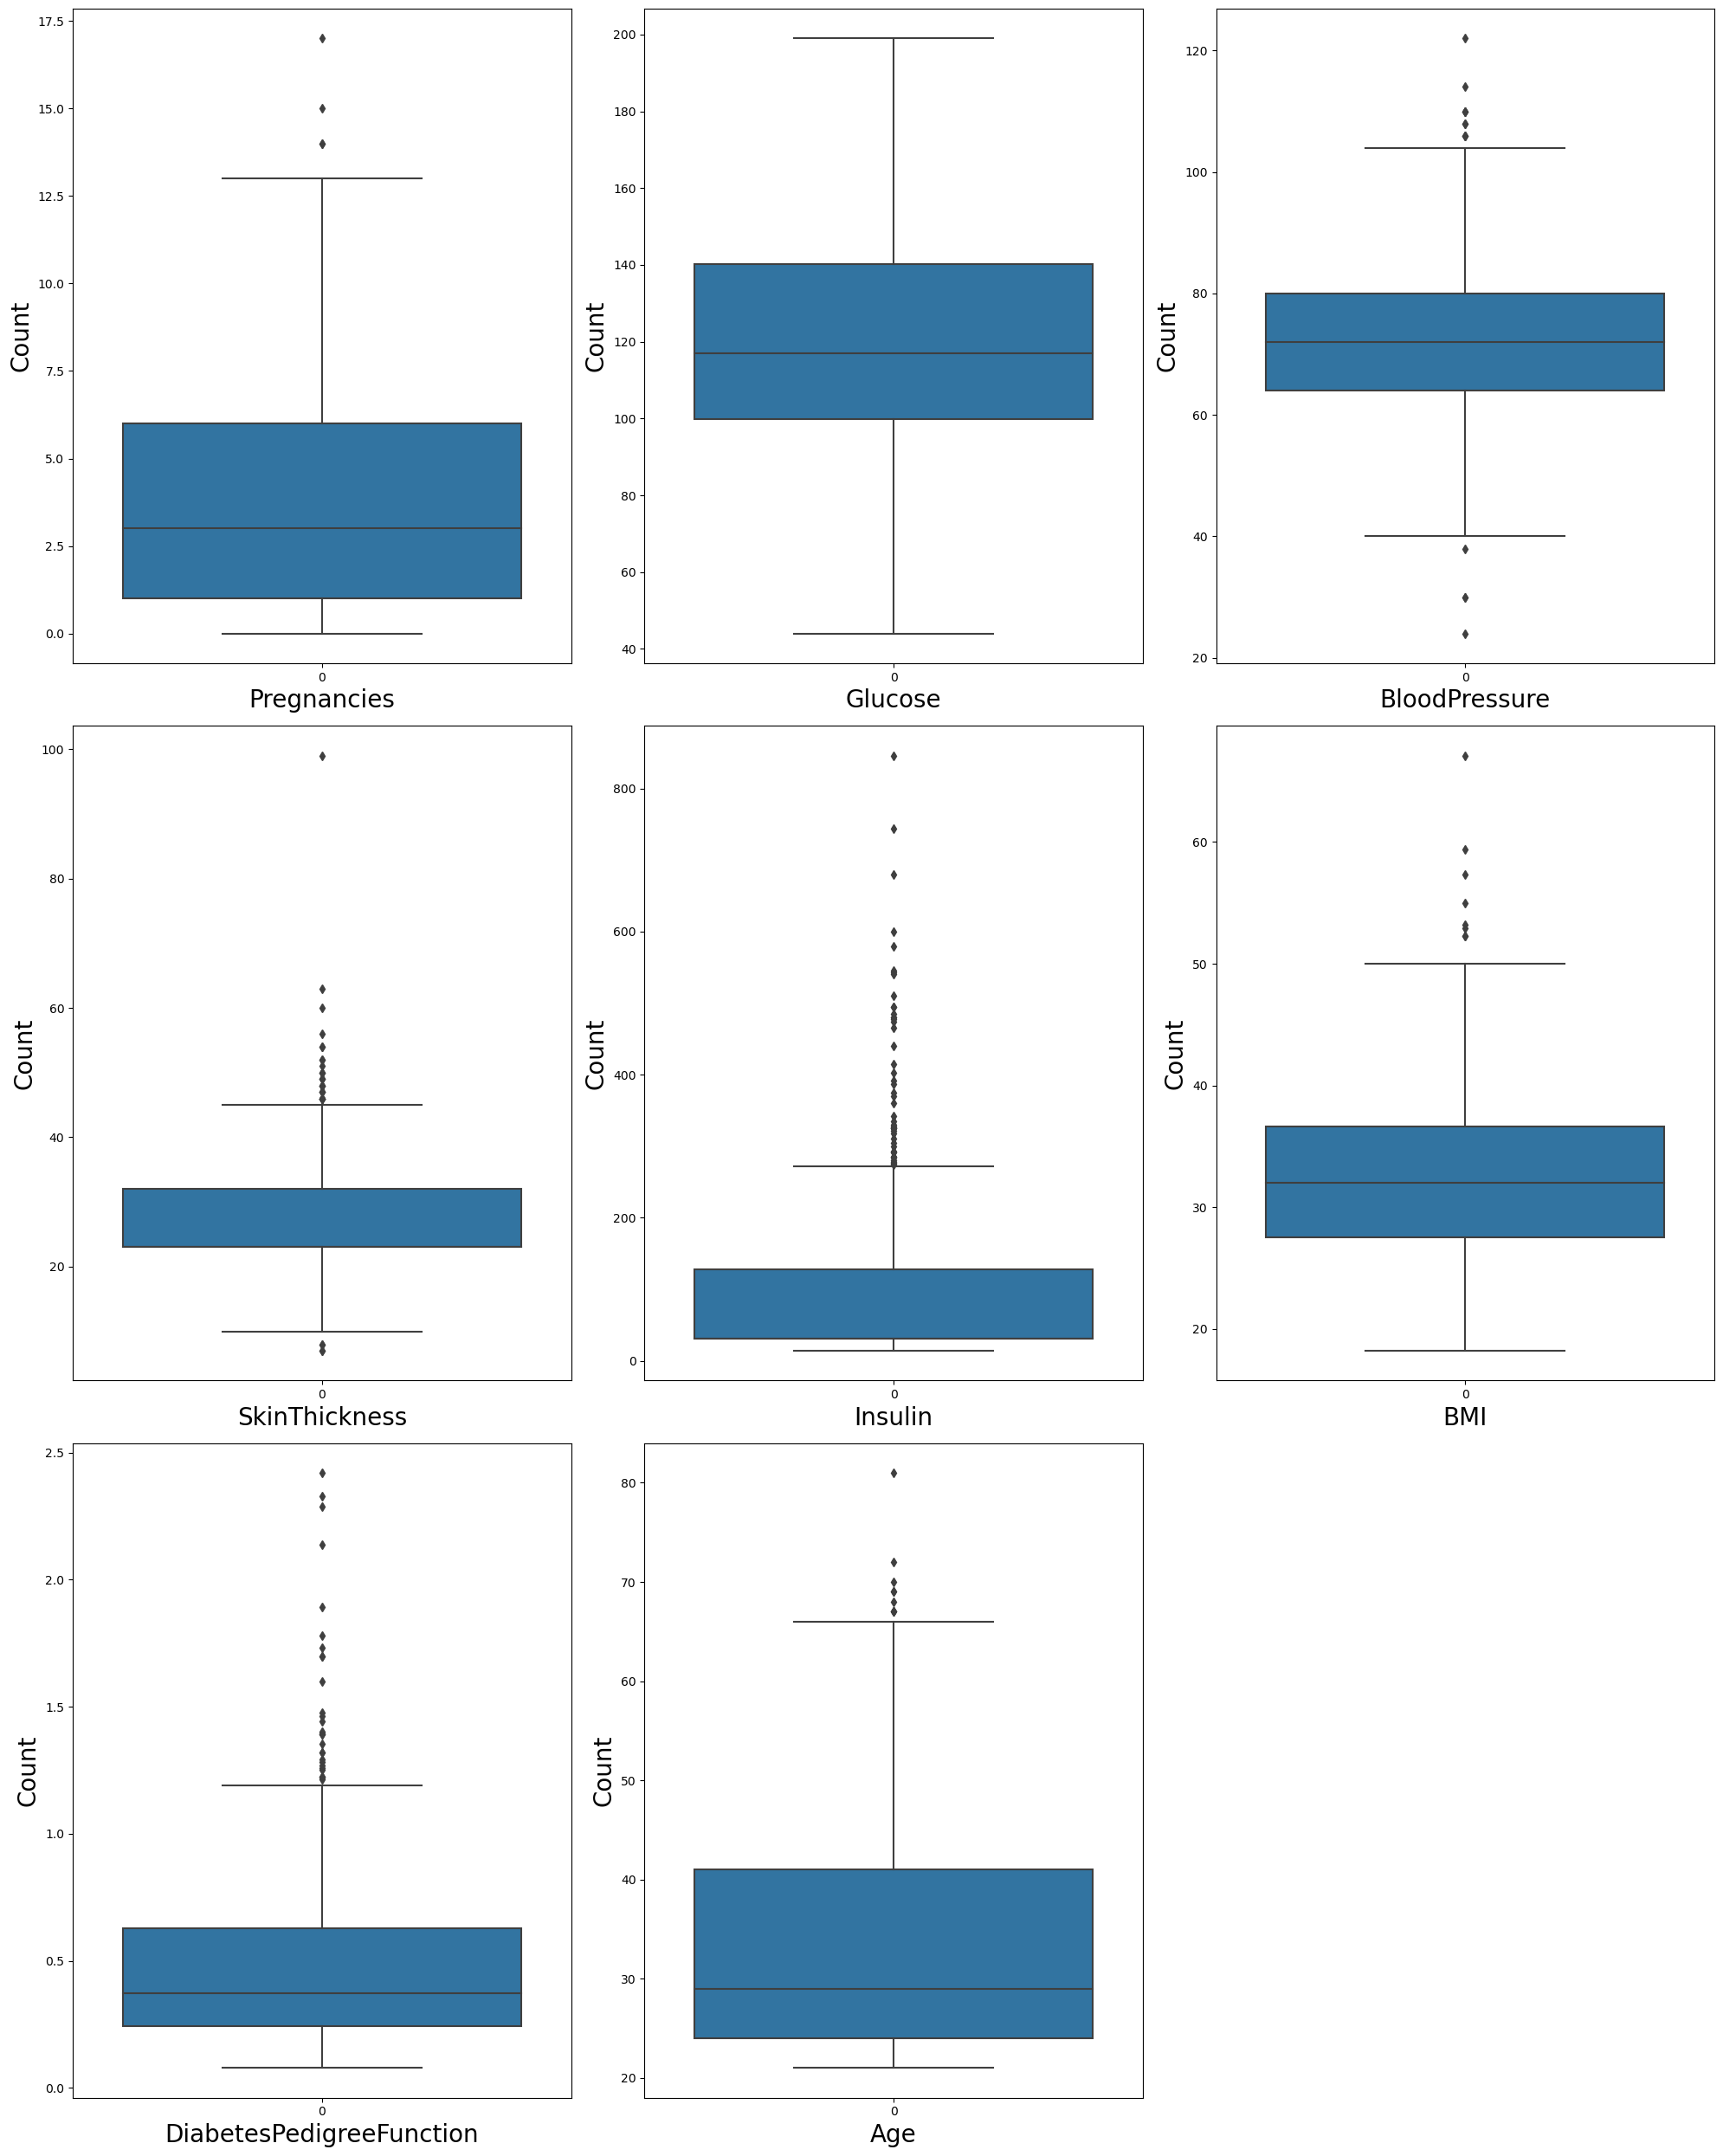

In [ ]:
#Checking the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data.drop('Outcome',axis=1):
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [ ]:
# Scale the continuous data
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler() # creating object
dl=['Pregnancies','Outcome']
data1=sc.fit_transform(data.drop(dl,axis=1))


In [ ]:
from sklearn.preprocessing import MinMaxscaler
sc=MinMaxScaler()
d1=['Pregnancies','Outcome']
data1=sc.fit_transform(data.drop(dl,axis=1))

In [ ]:
data1

array([[0.67096774, 0.48979592, 0.30434783, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.26451613, 0.42857143, 0.23913043, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.89677419, 0.40816327, 0.17391304, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.49677419, 0.48979592, 0.17391304, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.52903226, 0.36734694, 0.17391304, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.31612903, 0.46938776, 0.26086957, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data2=pd.DataFrame(data1,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
data2

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333


In [ ]:
con_data=data[['Pregnancies','Outcome']]


In [ ]:
con_data

,Pregnancies,Outcome
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [ ]:
final_df=pd.concat([data2,con_data],axis=1)

In [ ]:
final_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,6,1
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,1,0
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,8,1
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,1,0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0,1
...,...,...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,10,0
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000,2,0
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,5,0
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333,1,1


### Feature Selection

<Axes: >

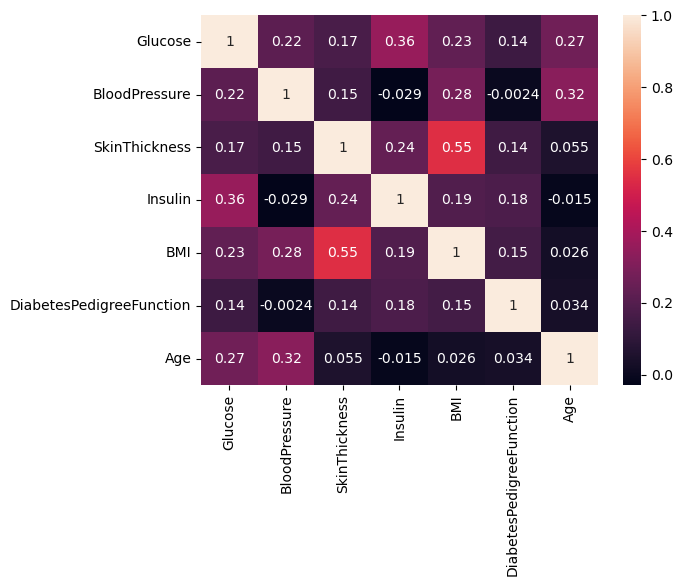

In [ ]:
# checking the correlation
sns.heatmap(data2.corr(),annot=True)
# No correlation between the features so we are not dropping any columns

### Model Creation

In [ ]:
# create input and output variable
X=final_df.iloc[:,:-1]
y=final_df.Outcome

In [ ]:
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,6
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,1
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,8
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,1
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0
...,...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,10
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000,2
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,5
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333,1


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
## Step 2 Creating training and testing data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=45)

In [ ]:
X_train.shape

(614, 8)

In [ ]:
X_test.shape

(154, 8)

In [ ]:
y_train.shape

(614,)

In [ ]:
y_test.shape

(154,)

In [ ]:
## Step 3 Model creation
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)  ## training

LogisticRegression()

In [ ]:
## Step 4 Prediction
y_pred=clf.predict(X_test)

In [ ]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [ ]:
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob

array([[0.33663888, 0.66336112],
       [0.90120845, 0.09879155],
       [0.74778048, 0.25221952],
       [0.54684365, 0.45315635],
       [0.80474717, 0.19525283],
       [0.85889198, 0.14110802],
       [0.52870232, 0.47129768],
       [0.92249035, 0.07750965],
       [0.37432263, 0.62567737],
       [0.91524759, 0.08475241],
       [0.24175399, 0.75824601],
       [0.54821873, 0.45178127],
       [0.94364227, 0.05635773],
       [0.43773737, 0.56226263],
       [0.73748528, 0.26251472],
       [0.9002487 , 0.0997513 ],
       [0.07218234, 0.92781766],
       [0.60661705, 0.39338295],
       [0.39147734, 0.60852266],
       [0.91445218, 0.08554782],
       [0.6624536 , 0.3375464 ],
       [0.71800741, 0.28199259],
       [0.57672536, 0.42327464],
       [0.82045709, 0.17954291],
       [0.79528562, 0.20471438],
       [0.37223823, 0.62776177],
       [0.85560895, 0.14439105],
       [0.34452647, 0.65547353],
       [0.22571232, 0.77428768],
       [0.83282826, 0.16717174],
       [0.

In [ ]:
#Evaluation of model
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[90 14]
 [24 26]]


In [ ]:
recall=recall_score(y_test,y_pred)
recall

0.52

In [ ]:
#recall = TP/TP+FN
26/50

0.52

In [ ]:
precision=precision_score(y_test,y_pred)
precision

0.65

In [ ]:
f1score=f1_score(y_test,y_pred)
f1score

0.5777777777777778

In [ ]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       104
           1       0.65      0.52      0.58        50

    accuracy                           0.75       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.74      0.75      0.75       154



### Multiclass Classification

In [ ]:
# loading dataset
df1= sns.load_dataset("iris")

In [ ]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
X=df1.iloc[:,:-1]
y=df1.species

In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
## Training and testing data
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,random_state=25)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_multi=LogisticRegression()
lr_multi.fit(X_train1,y_train1)
y_pred=lr_multi.predict(X_test1)

In [ ]:
y_pred

array(['setosa', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa'], dtype=object)

In [ ]:
f1score=f1_score(y_test1,y_pred,average='weighted')
f1score

0.973831844688861

In [ ]:
cr=classification_report(y_test1,y_pred)
print(cr)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.94      0.97        16
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

